## Text Mining

**Learning outcomes:**
- Learn and apply basic text mining techniques
- Apply text mining in a business context to maximize business value

Text mining combines both machine learning and natural language processing (NLP) to draw meaning from unstructured text documents. Text mining the driving force behind how a business analyst turns 50,000 hotel guest reviews into specific recommendationsm, how a workforce analyst improves productivity and reduces employee turnover and how companies are automating processes using chat bots.

A very popular and current strategy in this field is Vectorized Term Frequency and Inverse Document Frequency (TF-IDF) representation. In fact, google search engine also uses this technique when a word is searched. It is based on unsupervised learning technique. TF-IDF converts your document text into a bag of words and then assigns a weighted term to each word. In this chapter, we will discuss how to use text mining techniques to get meaningful results for text classification.

### Read Data

In [12]:
import pandas as pd
 
#this assumes one json item per line in json file
df=pd.read_json("TFIDF_news.json", lines=True)

In [13]:
df.dtypes

short_description            object
headline                     object
date                 datetime64[ns]
link                         object
authors                      object
category                     object
dtype: object

In [14]:
#number of rows (datapoints)
len(df)

124989

In [15]:
# Take sample of 3 to view the data
df.sample(3)

,short_description,headline,date,link,authors,category
100659,The hardest battles are not fault in the stree...,American Sniper Dials in on the Reality of War,2015-01-23,https://www.huffingtonpost.com/entry/american-...,"Zachary Bell, ContributorUnited States Marine ...",ENTERTAINMENT
74559,Mizzou seems to have catalyzed years of tensio...,Campus Racism Protests Didn't Come Out Of Nowh...,2015-11-16,https://www.huffingtonpost.com/entry/campus-ra...,"Tyler Kingkade, Lilly Workneh, and Ryan Grenoble",COLLEGE
48985,But also hilariously difficult.,These People Took On Puerto Rican Slang And It...,2016-09-02,https://www.huffingtonpost.com/entry/these-peo...,Carolina Moreno,LATINO VOICES


### Date range
Articles are between July 2014 and July 2018

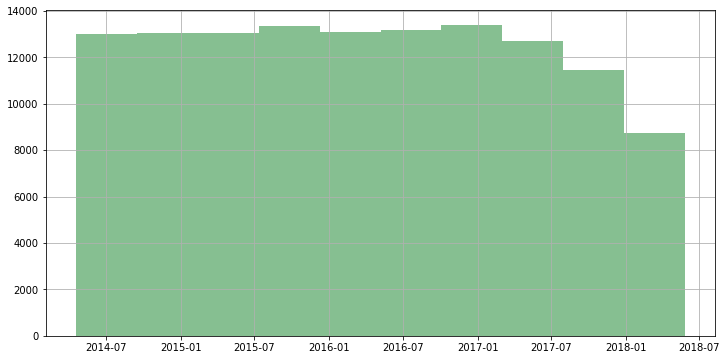

In [16]:
df.date.hist(figsize=(12,6),color='#86bf91',)


### Category Distribution

In our data, there are a total of 31 categories.

In [17]:
len(set(df['category'].values))

31


Most of the articles are related to politics. Education related articles have the lowest volume.

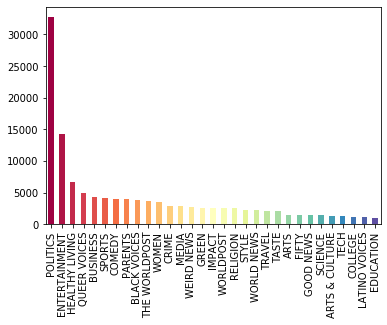

In [18]:
import matplotlib
import numpy as np
cmap = matplotlib.cm.get_cmap('Spectral')
rgba = [cmap(i) for i in np.linspace(0,1,len(set(df['category'].values)))]
df['category'].value_counts().plot(kind='bar',color =rgba)

### Texts for Classification

In our example, we will only use the headline to predict category. Also, we will only be using 2 categories sports and crime for simplicity. Notice that we are using `CRIME` and `COMDEDY` categories from our dataset.

(6864, 6)


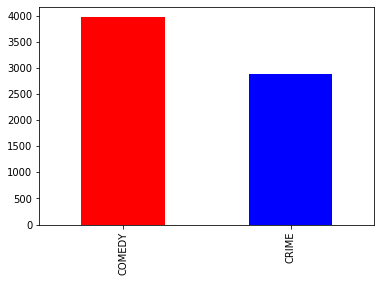

In [19]:
df_orig=df.copy()
df = df_orig[df_orig['category'].isin(['CRIME','COMEDY'])]
print(df.shape)
df.head()
df = df.loc[:, ['headline','category']]
df['category'].value_counts().plot(kind='bar',color =['r','b'])

### Vectorize

Text Vectorization is the process of converting text into numerical representation.

- Binary Term Frequency
- Bag of Words (BoW) Term Frequency
- (L1) Normalized Term Frequency
- (L2) Normalized TF-IDF
- Word2Vec

**Binary Term Frequency**

Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence  or absence.

**Bag of Words (BoW) Term Frequency**

Bag of Words (BoW) Term Frequency captures frequency of term in document. Under TfidfVectorizer, we set binary parameter equal to false so that it can show the actual frequency of the term and norm parameter equal to none.

The following code is an example of Bag of Words Term Frequency:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

sample_doc = ["Hello I am a boy", "Hello I am a student", "My name is Jill"]
cv=CountVectorizer(max_df=0.85)
word_count_vector=cv.fit_transform(sample_doc)
word_count_vector_arr = word_count_vector.toarray()
pd.DataFrame(word_count_vector_arr,columns=sorted(cv.vocabulary_, key=cv.vocabulary_.get))

,am,boy,hello,is,jill,my,name,student
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


An important note is the vocabulary is placed in a dictionary and `python` dictionaries are unsorted. Notice that the header in the following code is different from the first example.




In [21]:
## Wrong example
pd.DataFrame(word_count_vector_arr,columns=cv.vocabulary_)

,hello,am,boy,student,my,name,is,jill
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


This is because of dictionary in python. See below: 

In [22]:
cv.vocabulary_

{'hello': 2,
 'am': 0,
 'boy': 1,
 'student': 7,
 'my': 5,
 'name': 6,
 'is': 3,
 'jill': 4}

### CountVectorizer

Let's move on to our code example. Now, let's look at 10 words from our vocabulary. We have also removed words that appear in 95% of documents. In text analytics, such words (stop words) are not meaningful. A intuitive approach to understanding removal of stop words is that in a sentence, many words are present because of grammatical rules and do not add extra content or meaning. Ignoring such words would allow us to distill the key essence of a document and sentence. Sweet, after removing stop words by having `maxdf=0.95`, our key words are mostly crime and comedy related.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
docs=df['headline'].tolist()
# create a vocabulary of words, 
# ignore words that appear in 85% of documents, 
# eliminate stop words
cv=CountVectorizer(max_df=0.95)
word_count_vector=cv.fit_transform(docs)
list(cv.vocabulary_.keys())[:10]

['there',
 'were',
 'mass',
 'shootings',
 'in',
 'texas',
 'last',
 'week',
 'but',
 'only']

We can also use machine learning models learnt previously to classify our headlines! See code below:

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df['category_is_crime'] = df['category']=='CRIME'
X_train, X_test, y_train, y_test = train_test_split(word_count_vector, df['category_is_crime'], test_size=0.2, random_state=42)

Wow, we achieve 98.12% in classifying headlines. This is an remarkable feat for our machine!

In [25]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with TFIDF is .... {:.2f}%'.format(acc*100))

[[766  26]
 [ 40 541]]
Accuracy of a simple linear model with TFIDF is .... 95.19%


### TF-IDF

In [26]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_x_train = tfidf_transformer.fit_transform(X_train)
model1 = LogisticRegression()
model1.fit(tfidf_x_train, y_train)
tfidf_x_test = tfidf_transformer.transform(X_test)
y_pred = model1.predict(tfidf_x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with TFIDF is .... {:.2f}%'.format(acc*100))

[[777  15]
 [ 57 524]]
Accuracy of a simple linear model with TFIDF is .... 94.76%


### Feature extraction with TF-IDF

Apart from text classification, we can use TF-IDF to discover "important" keywords. Here is a few example that shows the importance of each individual word. Such technique is simple and easy to use. But on a cautionary note, using TF-IDF is heavily dependent on the input data and the importance of the text is closely related to the frequency in the document and across the entire data.

In [27]:
## Important keywords extraction using tfidf
print(df.iloc[1].headline)
vector = cv.transform([df.iloc[1].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Rachel Dolezal Faces Felony Charges For Welfare Fraud


[('welfare', 0.413332601468908),
 ('felony', 0.413332601468908),
 ('dolezal', 0.413332601468908),
 ('rachel', 0.3885287853920158),
 ('fraud', 0.3599880238280249),
 ('faces', 0.3103803916742406),
 ('charges', 0.2954500640160872),
 ('for', 0.15262948420298186)]

In [28]:
## Important keywords extraction using tfidf
print(df.iloc[5].headline)
vector = cv.transform([df.iloc[5].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Man Faces Charges After Pulling Knife, Stun Gun On Muslim Students At McDonald's


[('stun', 0.37604716794652987),
 ('pulling', 0.3658447343442784),
 ('knife', 0.32581708572483403),
 ('mcdonald', 0.32215742177499496),
 ('students', 0.30480662832662847),
 ('faces', 0.2922589939460096),
 ('muslim', 0.28707744879148683),
 ('charges', 0.27820036570239326),
 ('gun', 0.24718607863715278),
 ('at', 0.17925932409191916),
 ('after', 0.17428789091260877),
 ('man', 0.17199120825269787),
 ('on', 0.15323370190782204)]

In [29]:
comedy_1 = df[~df['category_is_crime']].iloc[0].headline
print(comedy_1)

Trump's New 'MAGA'-Themed Swimwear Sinks On Twitter


In [30]:
## Important keywords extraction using tfidf
vector = cv.transform([comedy_1])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

[('swimwear', 0.4735563110982704),
 ('sinks', 0.4735563110982704),
 ('maga', 0.4735563110982704),
 ('themed', 0.37841071080711314),
 ('twitter', 0.2770106227768904),
 ('new', 0.22822300865931006),
 ('on', 0.17796879475963143),
 ('trump', 0.15344404805174222)]

### Sample code

In [ ]:
import requests
from bs4 import BeautifulSoup

page = requests.get("http://www.facebook.com")
soup = BeautifulSoup(page.content, "html.parser")

print(soup)


In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

sample_words = ["marketing", "markets", "marketed", "marketer"]

print(sample_words)

for each in sample_words:
    print("{:s} -> {:s}".format(each, ps.stem(each)))

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wnl = WordNetLemmatizer()

print(wnl.lemmatize("beaten"))
print(wnl.lemmatize("beaten", "v"))
print(wnl.lemmatize("women", "n"))
print(wnl.lemmatize("happiest", "a"))

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download("tagsets")
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tokens=tknzr.tokenize(s0)
tagged = nltk.pos_tag(tokens)
print(tagged)


In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names


nltk.download("names")
def gender_features(word):
    return {'last_letter': word[-1]}


# Load data and training
names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])

#we will be using the last letter of each name as a feature for training the model
featuresets = [(gender_features(n), g) for (n, g) in names]
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(names)
print("Anny")
print(classifier.classify(gender_features('Anny')))

#### Sample code Part 2

The following code is written in R.

In [ ]:
library(dplyr)
data(stop_words)

d = readLines("C:/Users/User/Dropbox/TT Library/AI Model/Text & Sentiment Analytics/rally2004A.txt") #dplyr
d = data_frame(text = d)
d <- d %>% unnest_tokens(word, text)
d <- d %>% anti_join(stop_words)

d.afinn <- d %>% inner_join(get_sentiments("afinn")) %>% count(word, value) %>% arrange(desc(value))
d.afinn.score <- d.afinn %>% summarise(sum(value*n))
print(d.afinn.score)

library(tm)
wordcloud(words = d.afinn$word, freq = d.afinn$n)